$\Huge{\text{Logistic Regression}}$

In this session, we shall learn about the basics of logistic regression.

Let us first consider a sample data, which will be useful for our study of logistic regression.

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet.


In [ ]:
#Let us explore the data and the description

#Get the data from the web
data = pd.read_csv('http://users.stat.ufl.edu/~winner/data/challenger.dat', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data
data.head()


,0,1,2,3
0,1,66,0,0
1,2,70,1,1
2,3,69,0,0
3,4,68,0,0
4,5,67,0,0


In [ ]:
#if you wish to print the entire data, then use the following
data

,0,1,2,3
0,1,66,0,0
1,2,70,1,1
2,3,69,0,0
3,4,68,0,0
4,5,67,0,0
5,6,72,0,0
6,7,73,0,0
7,8,70,0,0
8,9,57,1,1
9,10,63,1,1


What do the numbers in the above data mean? Let us understand the data by seeing its description.

In [ ]:
import urllib.request  #this package is useful for accessing text files over internet
data_description_file = urllib.request.urlopen('http://users.stat.ufl.edu/~winner/data/challenger.txt')


for line in data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line)

Dataset: challenger.dat



Source: S.R. Dalal, E.B. Fowlkes, B. Hoadley (1989). "Risk

Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure,"

Journal of the American Statistical Association, Vol. 84, #408, pp. 945-957.



Description: Temperature and Failure of field-joint O-Ring failures

for 23 pre-Challenger space shuttle flights.



Variables/Columns

Flight sequence number  7-8

Temperature      15-16

# O-Ring Field joints with erosion or blowby   24

Indicator of erosion or blowby    32



Having known the data description, let us insert the descriptions into the data now.

In [ ]:
data.columns = ['Flight sequence number', 'Temperature', 'Number of O-Ring Field joints with erosion','Erosion Indicator']


#check by printing the data again
data.head()

,Flight sequence number,Temperature,Number of O-Ring Field joints with erosion,Erosion Indicator
0,1,66,0,0
1,2,70,1,1
2,3,69,0,0
3,4,68,0,0
4,5,67,0,0


We will consider Temperature and Erosion Indicator for analysis, therefore we will drop other columns.

In [ ]:
# drop columns 'Flight sequence number' and 'Number of O-Ring Field Joints with erosion'
data.pop('Flight sequence number')
data.pop('Number of O-Ring Field joints with erosion')

print('After dropping Flight sequence number and Number of O-Ring Field joints with erosion columns')
data.head()



After dropping Flight sequence number and Number of O-Ring Field joints with erosion columns


,Temperature,Erosion Indicator
0,66,0
1,70,1
2,69,0
3,68,0
4,67,0


Seeing the data as mere numbers might not be interesting. So, let us use some graphical ways to visualize the data.

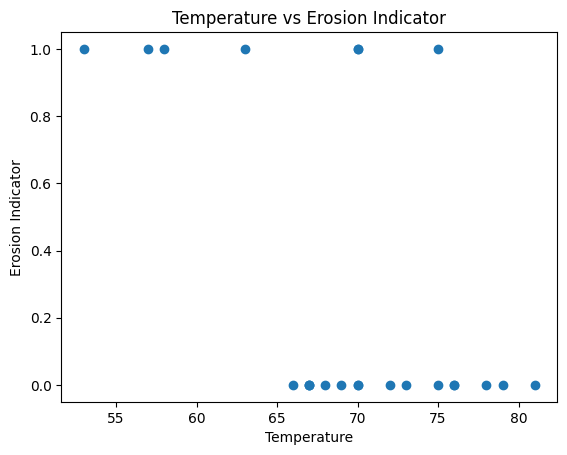

In [ ]:
#We will plot a scatter plot of Temperature vs Erosion Indicator

plt.scatter(data['Temperature'], data['Erosion Indicator'])
#plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.title("Temperature vs Erosion Indicator")
plt.xlabel("Temperature")
plt.ylabel("Erosion Indicator")
plt.show()

We see that the $y$ coordinates of the points (corresponding to the Erosion Indicator) are simply 0 and 1. Hence it would be unsuitable to model the given data using linear regression model.

$\large{\text{Question:}}$ How do we model the response variable in this situation?

$\large{\text{One Possible Solution:}}$ We will discuss logistic regression as a possible approach to model such situations where the response variable is dichotomous (or) binary-valued.  

$\Large{\text{Probabilistic interpretation}}$

$\textbf{Recall:}$ In linear regression, we assumed that in terms of probability, the response variable $Y \in {\mathbb{R}}$ was dependent on the predictor variable $X \in {\mathbb{R}}$ using the relation:

$
E[Y|X=x] =  \beta_0 + \beta_1 x.
$

However $\textbf{note}$ that the response variable $Y$ in linear regression was a real-valued quantity.  

However for our current data, $Y$ takes only the values $0$ and $1$. Hence if we wish to use a probabilistic idea for such binary-valued response variable, one straightforward idea comes from Bernoulli random variables.


$\large{\text{Bernoulli Random Variable}}$

Let $Z$ be a Bernoulli random variable taking values $0$ and $1$. Then the distribution of $Z$ is given by:

$
\begin{align}
P(Z=1) &= p, \\
P(Z=0) &= 1-p
\end{align}
$

where $p$ is the probability with which $Z$ takes the value $1$. $p$ is called the parameter of the Bernoulli distribution.

Also note that the expected value of $Z$ is given by: $E[Z] = p$.

Now considering our response random variable $Y$ as a Bernoulli random variable,we would have: $E[Y]=p$, where $p$ is the probability that $Y$ takes the value $1$.

However in the presence of a predictor random variable $X$, we can write the conditional expectation of $Y$ given an observation $x$ of $X$ as:

$
\begin{align}
E[Y|X=x] = p(x)
\end{align}
$

where we have assumed that the probability now has a dependence on the observation $x$.

For example, in our data, since $Y$ denotes the Erosion Indicator, and $X$ denotes the Temperature, we can assume that the probability that Erosion happens is somehow related to the observed value of Temperature.

There are multiple ways to model $p(x)$. In logistic regression, we assume the following:

$
p(x)=p(x;\beta_0,\beta_1) = \frac{e^{(\beta_0 + \beta_1 x)}}{1+e^{(\beta_0 + \beta_1 x)}}.
$

$\textbf{Note:}$ The form of $p(x)$ is assumed to be parametric, dependent on parameters $\beta_0, \beta_1$. The form of $p(x)$ in the previous equation is specifically called a $\textbf{(logistic) sigmoid}$ function.



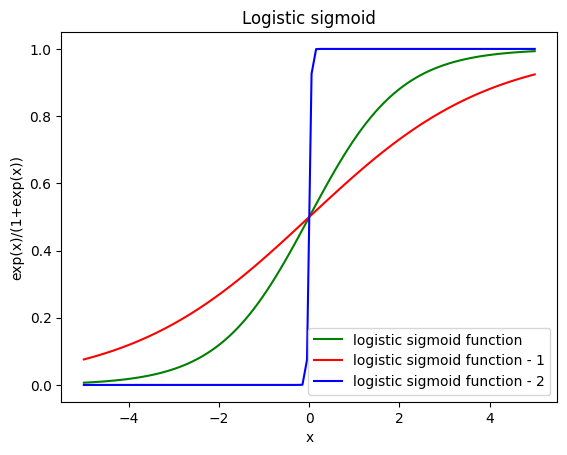

In [ ]:
#let us plot the logistic sigmoid function
x = np.linspace(-5,5,100) #creates a series of points in x axis
y = np.exp(x)/(1.0+np.exp(x))
y1 = np.exp(0.5*x)/(1.0+np.exp(0.5*x))
y2=np.exp(50*x)/(1.0+np.exp(50*x))
plt.plot(x, y, '-g', label='logistic sigmoid function')
plt.plot(x, y1, '-r', label='logistic sigmoid function - 1')
plt.plot(x, y2, '-b', label='logistic sigmoid function - 2')


plt.title("Logistic sigmoid")
plt.xlabel("x")
plt.ylabel("exp(x)/(1+exp(x))")
plt.legend(loc='lower right')
#plt.grid()
plt.show()

We can further write $p(x)$ equivalently as:

$
p(x)=p(x;\beta_0,\beta_1) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x)}}.
$

If we denote $p(x)$ simply as $p$ and if we have the notations $\mathbf{x}=\begin{bmatrix}
x \\ 1
\end{bmatrix}, \beta=\begin{bmatrix}
\beta_1 \\ \beta_0
\end{bmatrix}$
then we can write:

$
\begin{align}
p = \frac{1}{1+e^{-\beta^\top \mathbf{x}}}.
\end{align}
$

Then note the following that the following algebraic manipulations hold:

$
\begin{align}
p &= \frac{1}{1+e^{-\beta^\top \mathbf{x}}} \\
\implies 1 + e^{-\beta^\top \mathbf{x}} &= \frac{1}{p} \ \ (\text{since} \ p \in (0,1))\\
\implies  e^{-\beta^\top \mathbf{x}} &= \frac{1}{p} - 1 \\
\implies  e^{-\beta^\top \mathbf{x}} &= \frac{1-p}{p} \\
\implies \ln e^{-\beta^\top \mathbf{x}} &= \ln \frac{1-p}{p} \\
\implies -\beta^\top \mathbf{x} &= \ln \frac{1-p}{p} \\
\implies \beta^\top \mathbf{x} &= \ln \frac{p}{1-p} \\
\implies \beta_0 + \beta_1 x &= \ln \frac{p}{1-p}.
\end{align}
$

Thus, even if we did not have a straightforward dependence of $Y$ on an observation $x$ of $X$ as a linear relation, we see that the linear relation $\beta_0 + \beta_1 x$ is related to the probability $p$ using:

$
\ln\frac{p}{1-p}=\beta^\top \mathbf{x}.
$

Note that the ratio $\frac{p}{1-p}$ is called $\textbf{odds}$ that the event $Y=1$ occurs, and hence $\ln \frac{p}{1-p}$ denotes the $\textbf{log odds}$.

More popularly, the log odds $\ln \frac{p}{1-p}$ is called the $\textbf{logit}$ function.


<ipython-input-9-4b3ba8d9cd20>:3: RuntimeWarning: divide by zero encountered in divide
  y = np.log(x/(1-x))
<ipython-input-9-4b3ba8d9cd20>:3: RuntimeWarning: divide by zero encountered in log
  y = np.log(x/(1-x))


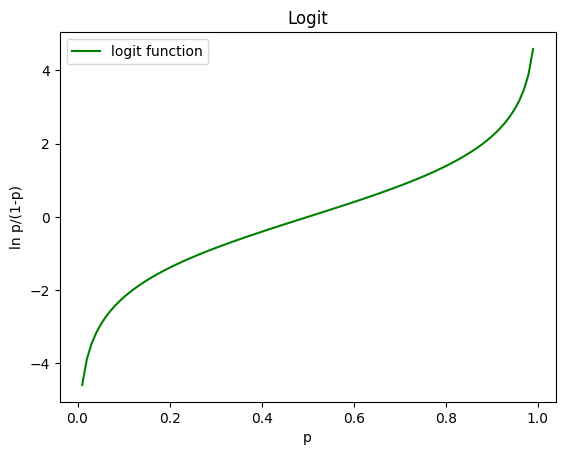

In [ ]:
#let us plot the logit function
x = np.linspace(0,1,100) #creates a series of points in x axis
y = np.log(x/(1-x))
plt.plot(x, y, '-g', label='logit function')


plt.title("Logit")
plt.xlabel("p")
plt.ylabel("ln p/(1-p)")
plt.legend(loc='upper left')
#plt.grid()
plt.show()

$\Large{\text{Likelihood function}}$

We now define a quantity which will be useful in the estimation of the parameters $\beta_0, \beta_1$ used to model $p$.


Given an observation $X=x$ we define the $\textbf{likelihood function}$ as:

$
L(y;p) = p^y(1-p)^{(1-y)}
$

where recall that $p=p(x)=p(x;\beta_0,\beta_1)=\frac{1}{1+e^{-{(\beta_0 + \beta_1 x)}}}$. Note that likelihood function is simply an equivalent way to represent $P[Y=y]$, when $Y$ is assumed to be Bernoulli random variable.

Then observe that the natural goal is to maximize the likelihood function with respect to parameters $\beta_0, \beta_1$.

Now given a data set $D$ containing $n$ observations of the form $\{({x}^1,y^1), ({x}^2,y^2), \ldots, ({x}^n,y^n)\}$, and assuming that the pairs $({x}^i,y^i)$ are independent observations, then it is possible to extend the likelihood function as:

$
\begin{align}
L(y^1,\ldots,y^n;p^1,\ldots,p^n) = \Pi_{i=1}^{n} {(p^i)}^{y^i}(1-p^i)^{(1-y^i)}.
\end{align}
$

We can now write the $\textbf{log likelihood}$ function as:

$
\begin{align}
\ln L(y^1,\ldots,y^n;p^1,\ldots,p^n) = \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
\end{align}
$

Since natural log function is monotonic, maximizing the likelihood function is equivalent to maximizing the log likelihood function.

Hence the concerned optimization problem is:

$
\max_{\beta_0, \beta_1} \ln L(y^1,\ldots,y^n;p^1;\ldots,p^n)= \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
$

Note that $p^i = p(x^i) = p(x^i; \beta_0, \beta_1) = \frac{1}{1+e^{-{(\beta_0 + \beta_1 x^i)}}}, \forall i = 1,\ldots,n$.



$\Large{\text{Solving the likelihood maximization problem}}:$

To solve

$
\max_{\beta_0, \beta_1} \ln L(y^1,\ldots,y^n;p^1;\ldots,p^n)= \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
$

we can find the derivatives of the objective function with respect to $\beta_0$ and $\beta_1$ as:

$
\begin{align}
\frac{\partial{ \ln L }} {\partial \beta_0} &= \sum_{i=1}^{n} y^i (1-p^i) - (1-y^i) p^i \\
\frac{\partial{ \ln L }} {\partial \beta_1} &= \sum_{i=1}^{n} x^i(y^i (1-p^i) - (1-y^i) p^i)
\end{align}.
$

Equating these derivatives to zero will lead to system of non-linear equations which is generally difficult to solve to obtain closed form expression.

Hence we generally adopt an iterative procedure as follows to find the optimal $\beta_0, \beta_1$.

$\large{\text{Gradient ascent for solving the likelihood maximization problem}}:$

$
\begin{align}
&\textbf{Step 0:}  \text{Input data set $D$, tolerances $\epsilon_1, \epsilon_2$.} \\
&\textbf{Step 1:}  \text{Start with arbitrary $\beta_0, \beta_1$.} \\
&\textbf{Step 2:}  \text{For $k=1,2,\ldots$} \\
&\quad \quad \textbf{Step 2.1:} \text{Compute differentials  $\frac{\partial{ \ln L }} {\partial \beta_0}$ and $\frac{\partial{ \ln L }} {\partial \beta_1}$} \\
&\quad \quad \textbf{Step 2.2:}  \text{Compute step length $\eta$ using line search procedure} \\
&\quad \quad \textbf{Step 2.3:}  \beta_0 = \beta_0 + \eta \frac{\partial{ \ln L }} {\partial \beta_0} \\
&\quad \quad \textbf{Step 2.4:}  \beta_1 = \beta_1 + \eta \frac{\partial{ \ln L }} {\partial \beta_1} \\
&\quad \quad \textbf{Step 2.5:}  \text{if $\|\nabla_{\beta} \ln L\|_2 \leq \epsilon_1$ break from loop} \\
&\quad \quad \textbf{Step 2.6:}  \text{if relative change in function value is $\leq \epsilon_2$ break from loop} \\
&\textbf{Step 3:}  \text{ Output $\beta_0, \beta_1$}
\end{align}
$

Note that $\nabla_{\beta} \ln L$ denotes the gradient of $\ln L$ with respect to $\beta$ given by:

$
\nabla_{\beta} \ln L = \begin{bmatrix}
\frac{\partial{ \ln L }} {\partial \beta_0}\\
\frac{\partial{ \ln L }} {\partial \beta_1}
\end{bmatrix}
$

and $\eta$ denotes the learning rate.


$\Large{\text{Computing } \beta \text{ for the erosion data set}}:$

In [ ]:
#Let us now compute beta
n = len(data.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 23


In [ ]:
import numpy as np
#computing log likelihood function
def log_likelihood(beta_0,beta_1):
  log_likelihood = 0.0
  for i in range(n):
    x_i = float(data.iat[i,0]) #access element at Temperature column
    y_i = float(data.iat[i,1]) #access element at Erosion Indicator column
    p_i = 1.0/(1.0+np.exp(-beta_0 - beta_1*x_i)) #probability with the current beta_0, beta_1
    log_likelihood += y_i * np.log(p_i) + (1.0-y_i)*np.log(1-p_i)
  return log_likelihood

In [ ]:
def linesearch(beta_0, beta_1, grad_beta_0, grad_beta_1,current_fval):
  alpha = 0.001

  fval_new = -99999999.
  while fval_new < current_fval:
    tmp_beta_0=beta_0+alpha*grad_beta_0
    tmp_beta_1=beta_1+alpha*grad_beta_1

    fval_new = log_likelihood(tmp_beta_0,tmp_beta_1)

    #print('within linesearch: alpha:', alpha, 'current_fval:',current_fval, 'new fval:',fval_new)
    alpha /= 2.
  return alpha


Initial values: beta_0: 0.0  beta_1: 0.0  log likeihood: -15.942385152878742
k:  0  beta_0: -0.00045000000000000004  beta_1: -0.0354  grad norm: 354.02860053956095 log likeihood: -17.72373214985557
k:  1000  beta_0: 0.05534627118250743  beta_1: -0.03081148229514116  grad norm: 270.3026849584184 log likeihood: -16.094534228345633
k:  2000  beta_0: 0.11083677814873592  beta_1: -0.031573942000495694  grad norm: 269.870716576639 log likeihood: -16.055192336148355
k:  3000  beta_0: 0.16609916223458426  beta_1: -0.03233258578464364  grad norm: 269.42920424577403 log likeihood: -16.01592268521159
k:  4000  beta_0: 0.2211337864371493  beta_1: -0.03308741894641424  grad norm: 268.9781537862703 log likeihood: -15.976725490032923
k:  5000  beta_0: 0.2759410179401617  beta_1: -0.03383844682694183  grad norm: 268.5175701564357 log likeihood: -15.937600974916588
k:  6000  beta_0: 0.33052122800976064  beta_1: -0.03458567480853039  grad norm: 268.04745746271016 log likeihood: -15.898549374050031
k:  7

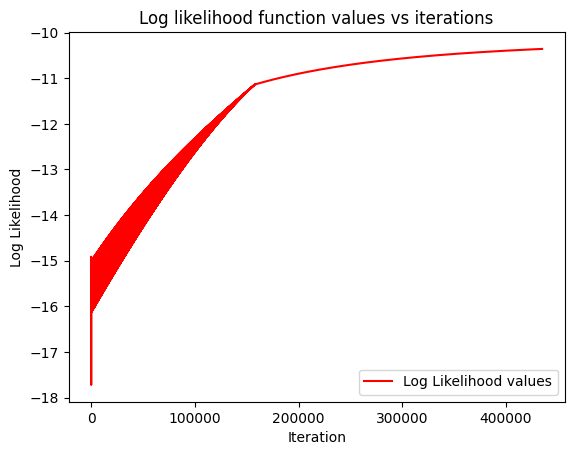

In [ ]:
#gradient ascent for likelihood maximization
beta_0 = 0.0
beta_1 = 0.0
max_iter = 500000
eps_1 = 0.1 #tolerance for gradient norm
eps_2 = 1e-9 #tolerance for relative function value difference

f_val = log_likelihood(beta_0,beta_1)

#store the objective function values for plotting purposes
f_val_list = []
f_val_list.append(f_val)

print('Initial values: beta_0:',beta_0, ' beta_1:',beta_1, ' log likeihood:', f_val)
#the loop
for k in range(max_iter):

  grad_beta_0 = 0.0
  grad_beta_1= 0.0
  #pass through the data to compute gradients
  for i in range(n):
    x_i = float(data.iat[i,0]) #access element at Temperature column
    y_i = float(data.iat[i,1]) #access element at Erosion Indicator column
    p_i = 1.0/(1.0+np.exp(-beta_0 - beta_1*x_i)) #probability with the current beta_0, beta_1
    grad_beta_0 +=  (y_i * (1.0-p_i)) - ((1.0-y_i) * p_i)
    grad_beta_1 +=  x_i * (y_i * (1.0-p_i) - (1.0-y_i) * p_i)

  #lr = linesearch(beta_0, beta_1, grad_beta_0, grad_beta_1, float(f_val_list[-1]))
  lr = 0.0001
  beta_0 += lr * grad_beta_0
  beta_1 += lr * grad_beta_1
  #print('k: ', k, ' grad beta_0: ', grad_beta_0, 'grad beta_1: ',grad_beta_1, 'beta_0:', beta_0, 'beta_1:',beta_1)
  grad_norm = np.sqrt(grad_beta_0**2 + grad_beta_1**2)
  f_val = log_likelihood(beta_0,beta_1)
  f_val_list.append(f_val)

  rel_change_in_fval = np.abs((f_val - f_val_list[-2])/f_val_list[-2])

  if k%1000+1 == 1:
    print('k: ', k,  ' beta_0:', beta_0, ' beta_1:',beta_1, ' grad norm:', grad_norm, 'log likeihood:', f_val)
  if grad_norm <= eps_1 or rel_change_in_fval <= eps_2:
    break
print('Final: k: ', k,  ' beta_0:', beta_0, ' beta_1:',beta_1, ' grad norm:', grad_norm, 'log likeihood:', f_val)


#plot the function values during optimization
plt.plot( f_val_list, '-r', label='Log Likelihood values')
plt.title("Log likelihood function values vs iterations")
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
plt.legend(loc='lower right')
#plt.grid()
plt.show()


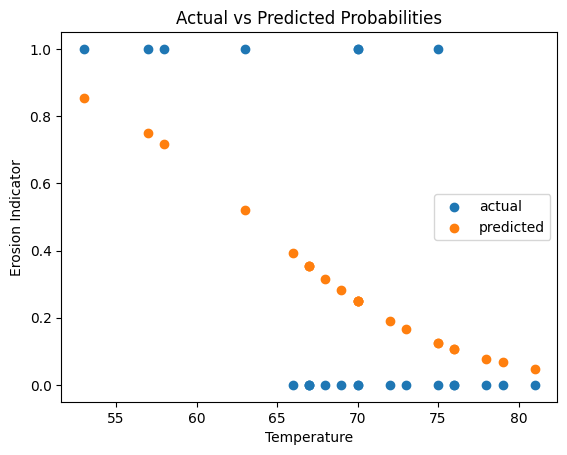

In [ ]:
#It would be useful to check the acutal y_i values against the predicted probabilities \hat{y}_i

predicted_probabilities = []
for i in range(n):
    x_i = float(data.iat[i,0]) #access element at Temperature column
    y_i = float(data.iat[i,1]) #access element at Erosion Indicator column
    p_i = 1.0/(1.0+np.exp(-beta_0 - beta_1*x_i)) #probability with the current beta_0, beta_1
    predicted_probabilities.append(p_i)


plt.scatter(data['Temperature'], data['Erosion Indicator'],label='actual')
plt.scatter(data['Temperature'], predicted_probabilities,label='predicted')

plt.title("Actual vs Predicted Probabilities")
plt.xlabel("Temperature")
plt.ylabel("Erosion Indicator")
plt.legend(loc='center right')
#plt.grid()
plt.show()

$\Large{\text{Exercise:}}$

Perform logistic regression with the following data sets:
1. Data: http://users.stat.ufl.edu/~winner/data/smkdth.dat
   Description: http://users.stat.ufl.edu/~winner/data/smkdth.txt
   
   Take the age and smoking status as predictor variables and survival status as response variable.
   
   For computing  prediction $\hat{y}(x)$ for an observation $X=x$, use the following rule:
   $
   \hat{y}(x) = \begin{cases}
          1 & \text { when } p(x) >= 0.5 \\
          0 &  \text { otherwise. }   
          \end{cases}
   $
   
   Report the accuracy as the percent of correctly predicted samples using the logistic regression model.

2. Data: http://users.stat.ufl.edu/~winner/data/subscript.dat
   Description: http://users.stat.ufl.edu/~winner/data/subscript.txt

   Take the subscription category as predictor variable and renewal status as response variable.

Plot the predictions and actual values in a scatter plot. Report the accuracy as the percent of correctly predicted samples using the logistic regression model.
Explain your observations.


$\Large{\text{References:}}$



1.   Joseph M. Hilbe, $\textit{Practical Guide to Logistic Regression}$. CRC Press,  2015.
2.   David Hosmer, Stanley Lameshow and Rodney Sturdivant. $\textit{Applied Logistic Regression}$. John Wiley $\&$ Sons, Inc., Hoboken, New Jersey, 2013.

